In [1]:
from platform import python_version
print(python_version())

3.8.5


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier   ##check neighbor spelling ( NOT neighbour)
from datetime import datetime

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/abhi1628/wind_speed_prediction/main/sat.csv')

In [4]:
data.head()

,X,Y,time,wind_speed
0,11.79,33.169998,42368.149155,47.0
1,11.82,33.219997,42368.149167,50.0
2,11.84,33.270000,42368.149178,50.0
3,11.87,33.309998,42368.149190,48.0
4,11.90,33.360001,42368.149202,43.0


In [5]:
data.describe()

,X,Y,time,wind_speed
count,72890.000000,72890.000000,72890.000000,72501.000000
mean,10.034617,38.312631,42544.424142,61.948746
std,6.977896,3.384122,107.806571,32.381322
min,-6.000000,30.439999,42368.149155,0.000000
25%,4.660000,35.959999,42450.441600,39.000000
50%,11.380000,38.279999,42537.127266,58.000000
75%,16.090000,40.809998,42635.268259,82.000000
max,20.000000,45.000000,42733.453068,215.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72890 entries, 0 to 72889
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           72890 non-null  float64
 1   Y           72890 non-null  float64
 2   time        72890 non-null  float64
 3   wind_speed  72501 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB


In [7]:
timestamp=42368.149155
#convert timestamp to datetime object
dt_object = datetime.fromtimestamp(timestamp)
print("dt_object:", dt_object)

dt_object: 1970-01-01 17:16:08.149155


In [8]:
for i in data['time']:
    dt_object=datetime.fromtimestamp(i)
    print(dt_object)

1970-01-01 17:16:08.149155
1970-01-01 17:16:08.149167
1970-01-01 17:16:08.149178
1970-01-01 17:16:08.149190
1970-01-01 17:16:08.149202
1970-01-01 17:16:08.149226
1970-01-01 17:16:08.149249
1970-01-01 17:16:08.149273
1970-01-01 17:16:08.149285
1970-01-01 17:16:08.149297
1970-01-01 17:16:08.149308
1970-01-01 17:16:08.149320
1970-01-01 17:16:08.149332
1970-01-01 17:16:08.149344
1970-01-01 17:16:08.149356
1970-01-01 17:16:08.149367
1970-01-01 17:16:08.149379
1970-01-01 17:16:08.149391
1970-01-01 17:16:08.149403
1970-01-01 17:16:08.149415
1970-01-01 17:16:08.149426
1970-01-01 17:16:08.149438
1970-01-01 17:16:08.149450
1970-01-01 17:16:08.149462
1970-01-01 17:16:08.149474
1970-01-01 17:16:08.149485
1970-01-01 17:16:08.149497
1970-01-01 17:16:08.149509
1970-01-01 17:16:08.149521
1970-01-01 17:16:08.149533
1970-01-01 17:16:08.149545
1970-01-01 17:16:08.149556
1970-01-01 17:16:08.149568
1970-01-01 17:16:08.149580
1970-01-01 17:16:08.149592
1970-01-01 17:16:08.149604
1970-01-01 17:16:08.149615
1

1970-01-01 17:16:14.083804
1970-01-01 17:16:14.083816
1970-01-01 17:16:14.083839
1970-01-01 17:16:14.083851
1970-01-01 17:16:14.083863
1970-01-01 17:16:14.083875
1970-01-01 17:16:14.083887
1970-01-01 17:16:14.083898
1970-01-01 17:16:14.083910
1970-01-01 17:16:14.083922
1970-01-01 17:16:14.083934
1970-01-01 17:16:14.083946
1970-01-01 17:16:14.083958
1970-01-01 17:16:14.163639
1970-01-01 17:16:14.163651
1970-01-01 17:16:14.163663
1970-01-01 17:16:14.163674
1970-01-01 17:16:14.163686
1970-01-01 17:16:14.163698
1970-01-01 17:16:14.163710
1970-01-01 17:16:14.163722
1970-01-01 17:16:14.163733
1970-01-01 17:16:14.163745
1970-01-01 17:16:14.163757
1970-01-01 17:16:14.163769
1970-01-01 17:16:14.163781
1970-01-01 17:16:14.163793
1970-01-01 17:16:14.163804
1970-01-01 17:16:14.163816
1970-01-01 17:16:14.163828
1970-01-01 17:16:14.163840
1970-01-01 17:16:14.163852
1970-01-01 17:16:14.163863
1970-01-01 17:16:14.163875
1970-01-01 17:16:14.163887
1970-01-01 17:16:14.163899
1970-01-01 17:16:14.163911
1

1970-01-01 17:16:21.031655
1970-01-01 17:16:21.031666
1970-01-01 17:16:21.031678
1970-01-01 17:16:21.031690
1970-01-01 17:16:21.031702
1970-01-01 17:16:21.031714
1970-01-01 17:16:21.031725
1970-01-01 17:16:21.031737
1970-01-01 17:16:21.031749
1970-01-01 17:16:21.031761
1970-01-01 17:16:21.031773
1970-01-01 17:16:21.031784
1970-01-01 17:16:21.031796
1970-01-01 17:16:21.031808
1970-01-01 17:16:21.031820
1970-01-01 17:16:21.031832
1970-01-01 17:16:21.031843
1970-01-01 17:16:21.031855
1970-01-01 17:16:21.031867
1970-01-01 17:16:21.031879
1970-01-01 17:16:21.031891
1970-01-01 17:16:21.031902
1970-01-01 17:16:21.031914
1970-01-01 17:16:21.031926
1970-01-01 17:16:21.031938
1970-01-01 17:16:21.031950
1970-01-01 17:16:21.031962
1970-01-01 17:16:21.031973
1970-01-01 17:16:21.031985
1970-01-01 17:16:21.031997
1970-01-01 17:16:21.032009
1970-01-01 17:16:21.032021
1970-01-01 17:16:21.032032
1970-01-01 17:16:21.032044
1970-01-01 17:16:21.032056
1970-01-01 17:16:21.032068
1970-01-01 17:16:21.032080
1

1970-01-01 17:16:24.410897
1970-01-01 17:16:24.410909
1970-01-01 17:16:24.410921
1970-01-01 17:16:24.410932
1970-01-01 17:16:24.410944
1970-01-01 17:16:24.410956
1970-01-01 17:16:24.410968
1970-01-01 17:16:24.410980
1970-01-01 17:16:24.410991
1970-01-01 17:16:24.411003
1970-01-01 17:16:24.411015
1970-01-01 17:16:24.411027
1970-01-01 17:16:24.411039
1970-01-01 17:16:24.411051
1970-01-01 17:16:24.411062
1970-01-01 17:16:24.411074
1970-01-01 17:16:24.411086
1970-01-01 17:16:24.411098
1970-01-01 17:16:24.411110
1970-01-01 17:16:24.411121
1970-01-01 17:16:24.411133
1970-01-01 17:16:24.411145
1970-01-01 17:16:24.411157
1970-01-01 17:16:24.411169
1970-01-01 17:16:24.411180
1970-01-01 17:16:24.411192
1970-01-01 17:16:24.411204
1970-01-01 17:16:24.411216
1970-01-01 17:16:24.411228
1970-01-01 17:16:24.411239
1970-01-01 17:16:24.411251
1970-01-01 17:16:24.411263
1970-01-01 17:16:24.411275
1970-01-01 17:16:24.411287
1970-01-01 17:16:24.411298
1970-01-01 17:16:24.411310
1970-01-01 17:16:24.411322
1

1970-01-01 17:16:26.030950
1970-01-01 17:16:26.030961
1970-01-01 17:16:26.030973
1970-01-01 17:16:26.030985
1970-01-01 17:16:26.030997
1970-01-01 17:16:26.031009
1970-01-01 17:16:26.031021
1970-01-01 17:16:26.031032
1970-01-01 17:16:26.031044
1970-01-01 17:16:26.031056
1970-01-01 17:16:26.031068
1970-01-01 17:16:26.031080
1970-01-01 17:16:26.031091
1970-01-01 17:16:26.031103
1970-01-01 17:16:26.031115
1970-01-01 17:16:26.031127
1970-01-01 17:16:26.031139
1970-01-01 17:16:26.031150
1970-01-01 17:16:26.031162
1970-01-01 17:16:26.031174
1970-01-01 17:16:26.031186
1970-01-01 17:16:26.031198
1970-01-01 17:16:26.441294
1970-01-01 17:16:26.441318
1970-01-01 17:16:26.441330
1970-01-01 17:16:26.441341
1970-01-01 17:16:26.441353
1970-01-01 17:16:26.441365
1970-01-01 17:16:26.441377
1970-01-01 17:16:26.441389
1970-01-01 17:16:26.441400
1970-01-01 17:16:26.441412
1970-01-01 17:16:26.441424
1970-01-01 17:16:26.441436
1970-01-01 17:16:26.441448
1970-01-01 17:16:26.441459
1970-01-01 17:16:26.441471
1

1970-01-01 17:16:31.359778
1970-01-01 17:16:31.359790
1970-01-01 17:16:31.359802
1970-01-01 17:16:31.359813
1970-01-01 17:16:31.359825
1970-01-01 17:16:31.359837
1970-01-01 17:16:31.359849
1970-01-01 17:16:31.359861
1970-01-01 17:16:31.359872
1970-01-01 17:16:31.359884
1970-01-01 17:16:31.359896
1970-01-01 17:16:31.360612
1970-01-01 17:16:31.360624
1970-01-01 17:16:31.360636
1970-01-01 17:16:31.360647
1970-01-01 17:16:31.360659
1970-01-01 17:16:31.360683
1970-01-01 17:16:31.360695
1970-01-01 17:16:31.360706
1970-01-01 17:16:31.963265
1970-01-01 17:16:31.963277
1970-01-01 17:16:31.963289
1970-01-01 17:16:31.963301
1970-01-01 17:16:31.963312
1970-01-01 17:16:31.963324
1970-01-01 17:16:31.963336
1970-01-01 17:16:31.963348
1970-01-01 17:16:31.963360
1970-01-01 17:16:31.963371
1970-01-01 17:16:31.963383
1970-01-01 17:16:31.963395
1970-01-01 17:16:31.963407
1970-01-01 17:16:31.963419
1970-01-01 17:16:31.963430
1970-01-01 17:16:31.963442
1970-01-01 17:16:31.963454
1970-01-01 17:16:31.963466
1

1970-01-01 17:16:40.863548
1970-01-01 17:16:40.863560
1970-01-01 17:16:40.863572
1970-01-01 17:16:40.863584
1970-01-01 17:16:40.863596
1970-01-01 17:16:40.863631
1970-01-01 17:16:40.863643
1970-01-01 17:16:40.863655
1970-01-01 17:16:40.863666
1970-01-01 17:16:40.863678
1970-01-01 17:16:40.863690
1970-01-01 17:16:40.863702
1970-01-01 17:16:40.863714
1970-01-01 17:16:40.863726
1970-01-01 17:16:40.863737
1970-01-01 17:16:40.863808
1970-01-01 17:16:40.863867
1970-01-01 17:16:40.863879
1970-01-01 17:16:40.863891
1970-01-01 17:16:40.863914
1970-01-01 17:16:40.863926
1970-01-01 17:16:40.863938
1970-01-01 17:16:40.863950
1970-01-01 17:16:40.863962
1970-01-01 17:16:40.863973
1970-01-01 17:16:40.863985
1970-01-01 17:16:40.864021
1970-01-01 17:16:40.864033
1970-01-01 17:16:40.864044
1970-01-01 17:16:40.864056
1970-01-01 17:16:40.864068
1970-01-01 17:16:40.864080
1970-01-01 17:16:40.864092
1970-01-01 17:16:40.864103
1970-01-01 17:16:40.864115
1970-01-01 17:16:40.864162
1970-01-01 17:16:40.864174
1

1970-01-01 17:16:47.208711
1970-01-01 17:16:47.208723
1970-01-01 17:16:47.208735
1970-01-01 17:16:47.208746
1970-01-01 17:16:47.208758
1970-01-01 17:16:47.208770
1970-01-01 17:16:47.208782
1970-01-01 17:16:47.208794
1970-01-01 17:16:47.208805
1970-01-01 17:16:47.208817
1970-01-01 17:16:47.208829
1970-01-01 17:16:47.208841
1970-01-01 17:16:47.208853
1970-01-01 17:16:47.208865
1970-01-01 17:16:47.208876
1970-01-01 17:16:47.208888
1970-01-01 17:16:47.208900
1970-01-01 17:16:47.208912
1970-01-01 17:16:47.208924
1970-01-01 17:16:47.208935
1970-01-01 17:16:47.208947
1970-01-01 17:16:47.208959
1970-01-01 17:16:47.208971
1970-01-01 17:16:47.208983
1970-01-01 17:16:47.208994
1970-01-01 17:16:47.209006
1970-01-01 17:16:47.209018
1970-01-01 17:16:47.209355
1970-01-01 17:16:47.209367
1970-01-01 17:16:47.209379
1970-01-01 17:16:47.209391
1970-01-01 17:16:47.209402
1970-01-01 17:16:47.209414
1970-01-01 17:16:47.209426
1970-01-01 17:16:47.209438
1970-01-01 17:16:47.209450
1970-01-01 17:16:47.209461
1

1970-01-01 17:16:52.204152
1970-01-01 17:16:52.204164
1970-01-01 17:16:52.204176
1970-01-01 17:16:52.204188
1970-01-01 17:16:52.204200
1970-01-01 17:16:52.204211
1970-01-01 17:16:52.204223
1970-01-01 17:16:52.204235
1970-01-01 17:16:52.204247
1970-01-01 17:16:52.204259
1970-01-01 17:16:52.204270
1970-01-01 17:16:52.204294
1970-01-01 17:16:52.204306
1970-01-01 17:16:52.204318
1970-01-01 17:16:52.204330
1970-01-01 17:16:52.204341
1970-01-01 17:16:52.204353
1970-01-01 17:16:52.204365
1970-01-01 17:16:52.204377
1970-01-01 17:16:52.204389
1970-01-01 17:16:52.204400
1970-01-01 17:16:52.204412
1970-01-01 17:16:52.204424
1970-01-01 17:16:52.204436
1970-01-01 17:16:52.204448
1970-01-01 17:16:52.204459
1970-01-01 17:16:52.204471
1970-01-01 17:16:52.204483
1970-01-01 17:16:52.204495
1970-01-01 17:16:52.204507
1970-01-01 17:16:52.204518
1970-01-01 17:16:52.204530
1970-01-01 17:16:52.205939
1970-01-01 17:16:52.205951
1970-01-01 17:16:52.205962
1970-01-01 17:16:52.205974
1970-01-01 17:16:52.205986
1

1970-01-01 17:16:53.745867
1970-01-01 17:16:53.745879
1970-01-01 17:16:53.745891
1970-01-01 17:16:53.745902
1970-01-01 17:16:53.745914
1970-01-01 17:16:53.745926
1970-01-01 17:16:53.745938
1970-01-01 17:16:53.745950
1970-01-01 17:16:53.745961
1970-01-01 17:16:53.745973
1970-01-01 17:16:53.745985
1970-01-01 17:16:53.745997
1970-01-01 17:16:53.746009
1970-01-01 17:16:53.746020
1970-01-01 17:16:53.746032
1970-01-01 17:16:53.746044
1970-01-01 17:16:53.746056
1970-01-01 17:16:53.746068
1970-01-01 17:16:53.746079
1970-01-01 17:16:53.746091
1970-01-01 17:16:53.746103
1970-01-01 17:16:53.746115
1970-01-01 17:16:53.746127
1970-01-01 17:16:53.746139
1970-01-01 17:16:53.746150
1970-01-01 17:16:53.746162
1970-01-01 17:16:53.746174
1970-01-01 17:16:53.746186
1970-01-01 17:16:53.746198
1970-01-01 17:16:53.746209
1970-01-01 17:16:53.746221
1970-01-01 17:16:53.746233
1970-01-01 17:16:53.746245
1970-01-01 17:16:53.746257
1970-01-01 17:16:53.746268
1970-01-01 17:16:53.746280
1970-01-01 17:16:53.746292
1

1970-01-01 17:16:57.123148
1970-01-01 17:16:57.123160
1970-01-01 17:16:57.123172
1970-01-01 17:16:57.123183
1970-01-01 17:16:57.123195
1970-01-01 17:16:57.123207
1970-01-01 17:16:57.123219
1970-01-01 17:16:57.123231
1970-01-01 17:16:57.123242
1970-01-01 17:16:57.123254
1970-01-01 17:16:57.123266
1970-01-01 17:16:57.123278
1970-01-01 17:16:57.123290
1970-01-01 17:16:57.123301
1970-01-01 17:16:57.123313
1970-01-01 17:16:57.123325
1970-01-01 17:16:57.123337
1970-01-01 17:16:57.123349
1970-01-01 17:16:57.123360
1970-01-01 17:16:57.123372
1970-01-01 17:16:57.123384
1970-01-01 17:16:57.123396
1970-01-01 17:16:57.123408
1970-01-01 17:16:57.123443
1970-01-01 17:16:57.123455
1970-01-01 17:16:57.123467
1970-01-01 17:16:57.123479
1970-01-01 17:16:57.123526
1970-01-01 17:16:57.123538
1970-01-01 17:16:57.123549
1970-01-01 17:16:57.123561
1970-01-01 17:16:57.123573
1970-01-01 17:16:57.123585
1970-01-01 17:16:57.123597
1970-01-01 17:16:57.123608
1970-01-01 17:16:57.123620
1970-01-01 17:16:57.123667
1

1970-01-01 17:16:57.729739
1970-01-01 17:16:57.729751
1970-01-01 17:16:58.138838
1970-01-01 17:16:58.138850
1970-01-01 17:16:58.138873
1970-01-01 17:16:58.138885
1970-01-01 17:16:58.138897
1970-01-01 17:16:58.138909
1970-01-01 17:16:58.138921
1970-01-01 17:16:58.138932
1970-01-01 17:16:58.138944
1970-01-01 17:16:58.138956
1970-01-01 17:16:58.138968
1970-01-01 17:16:58.138980
1970-01-01 17:16:58.139003
1970-01-01 17:16:58.139015
1970-01-01 17:16:58.139027
1970-01-01 17:16:58.139039
1970-01-01 17:16:58.139050
1970-01-01 17:16:58.139062
1970-01-01 17:16:58.139074
1970-01-01 17:16:58.139110
1970-01-01 17:16:58.139121
1970-01-01 17:16:58.139145
1970-01-01 17:16:58.139157
1970-01-01 17:16:58.139169
1970-01-01 17:16:58.139180
1970-01-01 17:16:58.139192
1970-01-01 17:16:58.139216
1970-01-01 17:16:58.139228
1970-01-01 17:16:58.139239
1970-01-01 17:16:58.139275
1970-01-01 17:16:58.139287
1970-01-01 17:16:58.139298
1970-01-01 17:16:58.139310
1970-01-01 17:16:58.139322
1970-01-01 17:16:58.139334
1

1970-01-01 17:17:02.121971
1970-01-01 17:17:02.121983
1970-01-01 17:17:02.121995
1970-01-01 17:17:02.724903
1970-01-01 17:17:02.724915
1970-01-01 17:17:02.724927
1970-01-01 17:17:02.724939
1970-01-01 17:17:02.724951
1970-01-01 17:17:02.724962
1970-01-01 17:17:02.724974
1970-01-01 17:17:02.724986
1970-01-01 17:17:02.724998
1970-01-01 17:17:02.725010
1970-01-01 17:17:02.725021
1970-01-01 17:17:02.725033
1970-01-01 17:17:02.725045
1970-01-01 17:17:02.725057
1970-01-01 17:17:02.725069
1970-01-01 17:17:02.725080
1970-01-01 17:17:02.725092
1970-01-01 17:17:02.725104
1970-01-01 17:17:02.725116
1970-01-01 17:17:02.725128
1970-01-01 17:17:02.725140
1970-01-01 17:17:02.725151
1970-01-01 17:17:02.725163
1970-01-01 17:17:02.725175
1970-01-01 17:17:02.725187
1970-01-01 17:17:02.725199
1970-01-01 17:17:02.725210
1970-01-01 17:17:02.725222
1970-01-01 17:17:02.725234
1970-01-01 17:17:02.725246
1970-01-01 17:17:02.725258
1970-01-01 17:17:02.725269
1970-01-01 17:17:02.725281
1970-01-01 17:17:02.725293
1

1970-01-01 17:17:03.741916
1970-01-01 17:17:03.741928
1970-01-01 17:17:03.741940
1970-01-01 17:17:03.741952
1970-01-01 17:17:03.741964
1970-01-01 17:17:03.741975
1970-01-01 17:17:03.741987
1970-01-01 17:17:03.741999
1970-01-01 17:17:03.742011
1970-01-01 17:17:03.742023
1970-01-01 17:17:03.742035
1970-01-01 17:17:03.742046
1970-01-01 17:17:03.742058
1970-01-01 17:17:03.742070
1970-01-01 17:17:03.742082
1970-01-01 17:17:03.742094
1970-01-01 17:17:03.742105
1970-01-01 17:17:03.742117
1970-01-01 17:17:03.742129
1970-01-01 17:17:03.742141
1970-01-01 17:17:03.742153
1970-01-01 17:17:03.742164
1970-01-01 17:17:03.742176
1970-01-01 17:17:03.742188
1970-01-01 17:17:03.742200
1970-01-01 17:17:03.742212
1970-01-01 17:17:03.742223
1970-01-01 17:17:03.742235
1970-01-01 17:17:04.072110
1970-01-01 17:17:04.072122
1970-01-01 17:17:04.072134
1970-01-01 17:17:04.072146
1970-01-01 17:17:04.072158
1970-01-01 17:17:04.072169
1970-01-01 17:17:04.072181
1970-01-01 17:17:04.072193
1970-01-01 17:17:04.072205
1

1970-01-01 17:17:08.659370
1970-01-01 17:17:08.659382
1970-01-01 17:17:08.659394
1970-01-01 17:17:08.659406
1970-01-01 17:17:08.659418
1970-01-01 17:17:08.659429
1970-01-01 17:17:08.659441
1970-01-01 17:17:08.659453
1970-01-01 17:17:08.659465
1970-01-01 17:17:08.659477
1970-01-01 17:17:08.659488
1970-01-01 17:17:08.659500
1970-01-01 17:17:08.659512
1970-01-01 17:17:08.659524
1970-01-01 17:17:08.659536
1970-01-01 17:17:08.659547
1970-01-01 17:17:08.659559
1970-01-01 17:17:08.659571
1970-01-01 17:17:08.659583
1970-01-01 17:17:08.659595
1970-01-01 17:17:08.659606
1970-01-01 17:17:08.659618
1970-01-01 17:17:08.659630
1970-01-01 17:17:08.659642
1970-01-01 17:17:08.659654
1970-01-01 17:17:08.659665
1970-01-01 17:17:08.659677
1970-01-01 17:17:08.659689
1970-01-01 17:17:08.659701
1970-01-01 17:17:08.659713
1970-01-01 17:17:08.659725
1970-01-01 17:17:08.659736
1970-01-01 17:17:08.659748
1970-01-01 17:17:08.659760
1970-01-01 17:17:08.659772
1970-01-01 17:17:08.659784
1970-01-01 17:17:08.659795
1

1970-01-01 17:17:14.592970
1970-01-01 17:17:14.592981
1970-01-01 17:17:14.592993
1970-01-01 17:17:14.593005
1970-01-01 17:17:14.593017
1970-01-01 17:17:14.593029
1970-01-01 17:17:14.593040
1970-01-01 17:17:14.593052
1970-01-01 17:17:14.593064
1970-01-01 17:17:14.593076
1970-01-01 17:17:14.593088
1970-01-01 17:17:14.593099
1970-01-01 17:17:14.593111
1970-01-01 17:17:14.593123
1970-01-01 17:17:14.593135
1970-01-01 17:17:14.593147
1970-01-01 17:17:14.593158
1970-01-01 17:17:14.593170
1970-01-01 17:17:14.593182
1970-01-01 17:17:14.593194
1970-01-01 17:17:14.593206
1970-01-01 17:17:14.593217
1970-01-01 17:17:14.593229
1970-01-01 17:17:14.593241
1970-01-01 17:17:14.593253
1970-01-01 17:17:14.593265
1970-01-01 17:17:14.593277
1970-01-01 17:17:14.593288
1970-01-01 17:17:14.593300
1970-01-01 17:17:14.593312
1970-01-01 17:17:14.593324
1970-01-01 17:17:14.593336
1970-01-01 17:17:14.593347
1970-01-01 17:17:14.593359
1970-01-01 17:17:14.593371
1970-01-01 17:17:14.593383
1970-01-01 17:17:14.593395
1

1970-01-01 17:17:19.923474
1970-01-01 17:17:19.923486
1970-01-01 17:17:19.923498
1970-01-01 17:17:19.923509
1970-01-01 17:17:19.923521
1970-01-01 17:17:19.923533
1970-01-01 17:17:19.923545
1970-01-01 17:17:19.923557
1970-01-01 17:17:19.923568
1970-01-01 17:17:19.923580
1970-01-01 17:17:19.923592
1970-01-01 17:17:19.923604
1970-01-01 17:17:19.923616
1970-01-01 17:17:19.923627
1970-01-01 17:17:19.923639
1970-01-01 17:17:19.923651
1970-01-01 17:17:19.923663
1970-01-01 17:17:19.923675
1970-01-01 17:17:19.923686
1970-01-01 17:17:19.923698
1970-01-01 17:17:19.923710
1970-01-01 17:17:19.923722
1970-01-01 17:17:19.923734
1970-01-01 17:17:19.923746
1970-01-01 17:17:19.923757
1970-01-01 17:17:19.923769
1970-01-01 17:17:19.923781
1970-01-01 17:17:19.923793
1970-01-01 17:17:19.923805
1970-01-01 17:17:19.923816
1970-01-01 17:17:19.923828
1970-01-01 17:17:19.923840
1970-01-01 17:17:19.923852
1970-01-01 17:17:19.923864
1970-01-01 17:17:19.923875
1970-01-01 17:17:19.923887
1970-01-01 17:17:19.923899
1

1970-01-01 17:17:28.491109
1970-01-01 17:17:28.491121
1970-01-01 17:17:28.491157
1970-01-01 17:17:28.491251
1970-01-01 17:17:28.491263
1970-01-01 17:17:28.491275
1970-01-01 17:17:28.491287
1970-01-01 17:17:28.491298
1970-01-01 17:17:28.491310
1970-01-01 17:17:28.491322
1970-01-01 17:17:28.491334
1970-01-01 17:17:28.491346
1970-01-01 17:17:28.491357
1970-01-01 17:17:28.491369
1970-01-01 17:17:28.491381
1970-01-01 17:17:28.491680
1970-01-01 17:17:28.491692
1970-01-01 17:17:28.491704
1970-01-01 17:17:28.491716
1970-01-01 17:17:28.491728
1970-01-01 17:17:28.491739
1970-01-01 17:17:28.491751
1970-01-01 17:17:28.491763
1970-01-01 17:17:28.491775
1970-01-01 17:17:28.491787
1970-01-01 17:17:28.491810
1970-01-01 17:17:28.491822
1970-01-01 17:17:28.491834
1970-01-01 17:17:28.491846
1970-01-01 17:17:28.491858
1970-01-01 17:17:28.901961
1970-01-01 17:17:28.901972
1970-01-01 17:17:28.901996
1970-01-01 17:17:28.902008
1970-01-01 17:17:28.902020
1970-01-01 17:17:28.902032
1970-01-01 17:17:28.902043
1

1970-01-01 17:17:35.439311
1970-01-01 17:17:35.439323
1970-01-01 17:17:35.439335
1970-01-01 17:17:35.439347
1970-01-01 17:17:35.439358
1970-01-01 17:17:35.439370
1970-01-01 17:17:35.439382
1970-01-01 17:17:35.439394
1970-01-01 17:17:35.439406
1970-01-01 17:17:35.439417
1970-01-01 17:17:35.439429
1970-01-01 17:17:35.439441
1970-01-01 17:17:35.439453
1970-01-01 17:17:35.439465
1970-01-01 17:17:35.439476
1970-01-01 17:17:35.439488
1970-01-01 17:17:35.439500
1970-01-01 17:17:35.439512
1970-01-01 17:17:35.439524
1970-01-01 17:17:35.439535
1970-01-01 17:17:35.439547
1970-01-01 17:17:35.439559
1970-01-01 17:17:35.439571
1970-01-01 17:17:35.439583
1970-01-01 17:17:35.439595
1970-01-01 17:17:35.439606
1970-01-01 17:17:35.439618
1970-01-01 17:17:35.439630
1970-01-01 17:17:35.439642
1970-01-01 17:17:35.439654
1970-01-01 17:17:35.439665
1970-01-01 17:17:35.439677
1970-01-01 17:17:35.439689
1970-01-01 17:17:35.439701
1970-01-01 17:17:35.439713
1970-01-01 17:17:35.439724
1970-01-01 17:17:35.439736
1

1970-01-01 17:17:40.769381
1970-01-01 17:17:40.769393
1970-01-01 17:17:40.769404
1970-01-01 17:17:40.769416
1970-01-01 17:17:40.770107
1970-01-01 17:17:40.770119
1970-01-01 17:17:40.770130
1970-01-01 17:17:40.770142
1970-01-01 17:17:40.770154
1970-01-01 17:17:40.770166
1970-01-01 17:17:40.770178
1970-01-01 17:17:40.770189
1970-01-01 17:17:40.770201
1970-01-01 17:17:40.770225
1970-01-01 17:17:41.372771
1970-01-01 17:17:41.372783
1970-01-01 17:17:41.372794
1970-01-01 17:17:41.372806
1970-01-01 17:17:41.372818
1970-01-01 17:17:41.372830
1970-01-01 17:17:41.372842
1970-01-01 17:17:41.372853
1970-01-01 17:17:41.372865
1970-01-01 17:17:41.372877
1970-01-01 17:17:41.372889
1970-01-01 17:17:41.372901
1970-01-01 17:17:41.372912
1970-01-01 17:17:41.372924
1970-01-01 17:17:41.372936
1970-01-01 17:17:41.372948
1970-01-01 17:17:41.372960
1970-01-01 17:17:41.372983
1970-01-01 17:17:41.372995
1970-01-01 17:17:41.373007
1970-01-01 17:17:41.373019
1970-01-01 17:17:41.373030
1970-01-01 17:17:41.373042
1

1970-01-01 17:17:48.321979
1970-01-01 17:17:48.321990
1970-01-01 17:17:48.322002
1970-01-01 17:17:48.322014
1970-01-01 17:17:48.322026
1970-01-01 17:17:48.322038
1970-01-01 17:17:48.322049
1970-01-01 17:17:48.322061
1970-01-01 17:17:48.322073
1970-01-01 17:17:48.322085
1970-01-01 17:17:48.322097
1970-01-01 17:17:48.322108
1970-01-01 17:17:48.322120
1970-01-01 17:17:48.322132
1970-01-01 17:17:48.322144
1970-01-01 17:17:48.322156
1970-01-01 17:17:48.322168
1970-01-01 17:17:48.322179
1970-01-01 17:17:48.322191
1970-01-01 17:17:48.322203
1970-01-01 17:17:48.322215
1970-01-01 17:17:48.322227
1970-01-01 17:17:48.322238
1970-01-01 17:17:48.322250
1970-01-01 17:17:48.322262
1970-01-01 17:17:48.322274
1970-01-01 17:17:48.322286
1970-01-01 17:17:48.322297
1970-01-01 17:17:48.322309
1970-01-01 17:17:48.322321
1970-01-01 17:17:48.322333
1970-01-01 17:17:48.322345
1970-01-01 17:17:48.322356
1970-01-01 17:17:48.322368
1970-01-01 17:17:48.322380
1970-01-01 17:17:48.322392
1970-01-01 17:17:48.322404
1

1970-01-01 17:17:56.617228
1970-01-01 17:17:56.617240
1970-01-01 17:17:56.617251
1970-01-01 17:17:56.617263
1970-01-01 17:17:56.617311
1970-01-01 17:17:56.617393
1970-01-01 17:17:56.617452
1970-01-01 17:17:56.617464
1970-01-01 17:17:56.617488
1970-01-01 17:17:56.617511
1970-01-01 17:17:56.617535
1970-01-01 17:17:56.617547
1970-01-01 17:17:56.617558
1970-01-01 17:17:56.617570
1970-01-01 17:17:56.617582
1970-01-01 17:17:56.617594
1970-01-01 17:17:56.617606
1970-01-01 17:17:56.617618
1970-01-01 17:17:56.617629
1970-01-01 17:17:56.617641
1970-01-01 17:17:56.617653
1970-01-01 17:17:56.617665
1970-01-01 17:17:56.617677
1970-01-01 17:17:56.617688
1970-01-01 17:17:56.617712
1970-01-01 17:17:56.617736
1970-01-01 17:17:56.617747
1970-01-01 17:17:56.617759
1970-01-01 17:17:56.617771
1970-01-01 17:17:56.617783
1970-01-01 17:17:56.617795
1970-01-01 17:17:56.617806
1970-01-01 17:17:56.617818
1970-01-01 17:17:56.617842
1970-01-01 17:17:56.617854
1970-01-01 17:17:56.617865
1970-01-01 17:17:56.617877
1

1970-01-01 17:18:02.220279
1970-01-01 17:18:02.220291
1970-01-01 17:18:02.220303
1970-01-01 17:18:02.220315
1970-01-01 17:18:02.220327
1970-01-01 17:18:02.220338
1970-01-01 17:18:02.220350
1970-01-01 17:18:02.220362
1970-01-01 17:18:02.220374
1970-01-01 17:18:02.220386
1970-01-01 17:18:02.220398
1970-01-01 17:18:02.220409
1970-01-01 17:18:02.220421
1970-01-01 17:18:02.220433
1970-01-01 17:18:02.220445
1970-01-01 17:18:02.220457
1970-01-01 17:18:02.220468
1970-01-01 17:18:02.220480
1970-01-01 17:18:02.220492
1970-01-01 17:18:02.220504
1970-01-01 17:18:02.220516
1970-01-01 17:18:02.220527
1970-01-01 17:18:02.220539
1970-01-01 17:18:02.220551
1970-01-01 17:18:02.220563
1970-01-01 17:18:02.220575
1970-01-01 17:18:02.220586
1970-01-01 17:18:02.220598
1970-01-01 17:18:02.220610
1970-01-01 17:18:02.220622
1970-01-01 17:18:02.220634
1970-01-01 17:18:02.550576
1970-01-01 17:18:02.550588
1970-01-01 17:18:02.550600
1970-01-01 17:18:02.550659
1970-01-01 17:18:02.550671
1970-01-01 17:18:02.550683
1

1970-01-01 17:18:06.535614
1970-01-01 17:18:06.535626
1970-01-01 17:18:06.535637
1970-01-01 17:18:06.535649
1970-01-01 17:18:06.535661
1970-01-01 17:18:06.535673
1970-01-01 17:18:06.535685
1970-01-01 17:18:06.535708
1970-01-01 17:18:06.535720
1970-01-01 17:18:06.535732
1970-01-01 17:18:06.535744
1970-01-01 17:18:06.535756
1970-01-01 17:18:06.535767
1970-01-01 17:18:06.535779
1970-01-01 17:18:06.535791
1970-01-01 17:18:06.535803
1970-01-01 17:18:06.535815
1970-01-01 17:18:06.535826
1970-01-01 17:18:06.535838
1970-01-01 17:18:06.535850
1970-01-01 17:18:06.535862
1970-01-01 17:18:06.535874
1970-01-01 17:18:06.535885
1970-01-01 17:18:06.535897
1970-01-01 17:18:06.535909
1970-01-01 17:18:06.535921
1970-01-01 17:18:06.535933
1970-01-01 17:18:06.535944
1970-01-01 17:18:07.136860
1970-01-01 17:18:07.136871
1970-01-01 17:18:07.136883
1970-01-01 17:18:07.136895
1970-01-01 17:18:07.136907
1970-01-01 17:18:07.136919
1970-01-01 17:18:07.136931
1970-01-01 17:18:07.136942
1970-01-01 17:18:07.136954
1

1970-01-01 17:18:14.498185
1970-01-01 17:18:14.498197
1970-01-01 17:18:14.498209
1970-01-01 17:18:14.498221
1970-01-01 17:18:14.498232
1970-01-01 17:18:15.101488
1970-01-01 17:18:15.101500
1970-01-01 17:18:15.101512
1970-01-01 17:18:15.101524
1970-01-01 17:18:15.101535
1970-01-01 17:18:15.101547
1970-01-01 17:18:15.101559
1970-01-01 17:18:15.101571
1970-01-01 17:18:15.101583
1970-01-01 17:18:15.101594
1970-01-01 17:18:15.101606
1970-01-01 17:18:15.101618
1970-01-01 17:18:15.101630
1970-01-01 17:18:15.101642
1970-01-01 17:18:15.101653
1970-01-01 17:18:15.101665
1970-01-01 17:18:15.101677
1970-01-01 17:18:15.101689
1970-01-01 17:18:15.101701
1970-01-01 17:18:15.101712
1970-01-01 17:18:15.101724
1970-01-01 17:18:15.101748
1970-01-01 17:18:15.101760
1970-01-01 17:18:15.101771
1970-01-01 17:18:15.101783
1970-01-01 17:18:15.101795
1970-01-01 17:18:15.101807
1970-01-01 17:18:15.101819
1970-01-01 17:18:15.101830
1970-01-01 17:18:15.101842
1970-01-01 17:18:15.101854
1970-01-01 17:18:15.101866
1

1970-01-01 17:18:20.431313
1970-01-01 17:18:20.431324
1970-01-01 17:18:20.431336
1970-01-01 17:18:20.431348
1970-01-01 17:18:20.431360
1970-01-01 17:18:20.431372
1970-01-01 17:18:20.431383
1970-01-01 17:18:20.431395
1970-01-01 17:18:20.431407
1970-01-01 17:18:20.431419
1970-01-01 17:18:20.431431
1970-01-01 17:18:20.431442
1970-01-01 17:18:20.431454
1970-01-01 17:18:20.431466
1970-01-01 17:18:20.431478
1970-01-01 17:18:20.431490
1970-01-01 17:18:20.431501
1970-01-01 17:18:20.431513
1970-01-01 17:18:20.431525
1970-01-01 17:18:20.431537
1970-01-01 17:18:20.431549
1970-01-01 17:18:20.431560
1970-01-01 17:18:20.431572
1970-01-01 17:18:20.431584
1970-01-01 17:18:20.431596
1970-01-01 17:18:20.431608
1970-01-01 17:18:20.431620
1970-01-01 17:18:20.431631
1970-01-01 17:18:20.431643
1970-01-01 17:18:20.431655
1970-01-01 17:18:20.431667
1970-01-01 17:18:20.431679
1970-01-01 17:18:20.431690
1970-01-01 17:18:20.431702
1970-01-01 17:18:20.431714
1970-01-01 17:18:20.431726
1970-01-01 17:18:20.431738
1

1970-01-01 17:18:26.365974
1970-01-01 17:18:26.365986
1970-01-01 17:18:26.365998
1970-01-01 17:18:26.366021
1970-01-01 17:18:26.366057
1970-01-01 17:18:26.366069
1970-01-01 17:18:26.366080
1970-01-01 17:18:26.366116
1970-01-01 17:18:26.366128
1970-01-01 17:18:26.366139
1970-01-01 17:18:26.366151
1970-01-01 17:18:26.366163
1970-01-01 17:18:26.366175
1970-01-01 17:18:26.366187
1970-01-01 17:18:26.366198
1970-01-01 17:18:26.366210
1970-01-01 17:18:26.366222
1970-01-01 17:18:26.366234
1970-01-01 17:18:26.366246
1970-01-01 17:18:26.366257
1970-01-01 17:18:26.366269
1970-01-01 17:18:26.366281
1970-01-01 17:18:26.366293
1970-01-01 17:18:26.366305
1970-01-01 17:18:26.366317
1970-01-01 17:18:26.366328
1970-01-01 17:18:26.366352
1970-01-01 17:18:26.366376
1970-01-01 17:18:26.366411
1970-01-01 17:18:26.366423
1970-01-01 17:18:26.366458
1970-01-01 17:18:26.366482
1970-01-01 17:18:26.366553
1970-01-01 17:18:26.366564
1970-01-01 17:18:26.366576
1970-01-01 17:18:26.366588
1970-01-01 17:18:26.366612
1

1970-01-01 17:18:33.314070
1970-01-01 17:18:33.314081
1970-01-01 17:18:33.314093
1970-01-01 17:18:33.314105
1970-01-01 17:18:33.314117
1970-01-01 17:18:33.314140
1970-01-01 17:18:33.314152
1970-01-01 17:18:33.314176
1970-01-01 17:18:33.314188
1970-01-01 17:18:33.314200
1970-01-01 17:18:33.314211
1970-01-01 17:18:33.314223
1970-01-01 17:18:33.314235
1970-01-01 17:18:33.314247
1970-01-01 17:18:33.314259
1970-01-01 17:18:33.314270
1970-01-01 17:18:33.314294
1970-01-01 17:18:33.314306
1970-01-01 17:18:33.314318
1970-01-01 17:18:33.314329
1970-01-01 17:18:33.314341
1970-01-01 17:18:33.314353
1970-01-01 17:18:33.314365
1970-01-01 17:18:33.314377
1970-01-01 17:18:33.314388
1970-01-01 17:18:33.314400
1970-01-01 17:18:33.314412
1970-01-01 17:18:33.314424
1970-01-01 17:18:33.314436
1970-01-01 17:18:33.314447
1970-01-01 17:18:33.314459
1970-01-01 17:18:33.314471
1970-01-01 17:18:33.314483
1970-01-01 17:18:33.314495
1970-01-01 17:18:33.314507
1970-01-01 17:18:33.314530
1970-01-01 17:18:33.314542
1

1970-01-01 17:18:40.868442
1970-01-01 17:18:40.868454
1970-01-01 17:18:40.868465
1970-01-01 17:18:40.868489
1970-01-01 17:18:40.868513
1970-01-01 17:18:40.868524
1970-01-01 17:18:40.868536
1970-01-01 17:18:40.868548
1970-01-01 17:18:40.868560
1970-01-01 17:18:40.868572
1970-01-01 17:18:40.868583
1970-01-01 17:18:40.868607
1970-01-01 17:18:40.868619
1970-01-01 17:18:40.868631
1970-01-01 17:18:40.868643
1970-01-01 17:18:41.276216
1970-01-01 17:18:41.276228
1970-01-01 17:18:41.276240
1970-01-01 17:18:41.276252
1970-01-01 17:18:41.276263
1970-01-01 17:18:41.276275
1970-01-01 17:18:41.276287
1970-01-01 17:18:41.276299
1970-01-01 17:18:41.276311
1970-01-01 17:18:41.276322
1970-01-01 17:18:41.276334
1970-01-01 17:18:41.276346
1970-01-01 17:18:41.276358
1970-01-01 17:18:41.276370
1970-01-01 17:18:41.276381
1970-01-01 17:18:41.276405
1970-01-01 17:18:41.276429
1970-01-01 17:18:41.276440
1970-01-01 17:18:41.278027
1970-01-01 17:18:41.278051
1970-01-01 17:18:41.278062
1970-01-01 17:18:41.278074
1

1970-01-01 17:18:50.783530
1970-01-01 17:18:50.783542
1970-01-01 17:18:50.783554
1970-01-01 17:18:50.784017
1970-01-01 17:18:50.784040
1970-01-01 17:18:50.784052
1970-01-01 17:18:50.784064
1970-01-01 17:18:50.784076
1970-01-01 17:18:50.784087
1970-01-01 17:18:50.784099
1970-01-01 17:18:50.784111
1970-01-01 17:18:50.784123
1970-01-01 17:18:50.784135
1970-01-01 17:18:50.784147
1970-01-01 17:18:50.784158
1970-01-01 17:18:50.784170
1970-01-01 17:18:50.784182
1970-01-01 17:18:50.784194
1970-01-01 17:18:50.784206
1970-01-01 17:18:50.784217
1970-01-01 17:18:50.784229
1970-01-01 17:18:50.784241
1970-01-01 17:18:50.784253
1970-01-01 17:18:50.784265
1970-01-01 17:18:50.784276
1970-01-01 17:18:50.784288
1970-01-01 17:18:51.191868
1970-01-01 17:18:51.191879
1970-01-01 17:18:51.191891
1970-01-01 17:18:51.191903
1970-01-01 17:18:51.191915
1970-01-01 17:18:51.191927
1970-01-01 17:18:51.191938
1970-01-01 17:18:51.191950
1970-01-01 17:18:51.191962
1970-01-01 17:18:51.191974
1970-01-01 17:18:51.191986
1

1970-01-01 17:18:56.111392
1970-01-01 17:18:56.111404
1970-01-01 17:18:56.111416
1970-01-01 17:18:56.111427
1970-01-01 17:18:56.111439
1970-01-01 17:18:56.111451
1970-01-01 17:18:56.111463
1970-01-01 17:18:56.111475
1970-01-01 17:18:56.111486
1970-01-01 17:18:56.111498
1970-01-01 17:18:56.111510
1970-01-01 17:18:56.111522
1970-01-01 17:18:56.111534
1970-01-01 17:18:56.111545
1970-01-01 17:18:56.111557
1970-01-01 17:18:56.111569
1970-01-01 17:18:56.111581
1970-01-01 17:18:56.111593
1970-01-01 17:18:56.111604
1970-01-01 17:18:56.111616
1970-01-01 17:18:56.111628
1970-01-01 17:18:56.111640
1970-01-01 17:18:56.111652
1970-01-01 17:18:56.111664
1970-01-01 17:18:56.111675
1970-01-01 17:18:56.111687
1970-01-01 17:18:56.111699
1970-01-01 17:18:56.111711
1970-01-01 17:18:56.111723
1970-01-01 17:18:56.111734
1970-01-01 17:18:56.111746
1970-01-01 17:18:56.111758
1970-01-01 17:18:56.111770
1970-01-01 17:18:56.111782
1970-01-01 17:18:56.111793
1970-01-01 17:18:56.111805
1970-01-01 17:18:56.111817
1

1970-01-01 17:19:03.061558
1970-01-01 17:19:03.061570
1970-01-01 17:19:03.061582
1970-01-01 17:19:03.061594
1970-01-01 17:19:03.061605
1970-01-01 17:19:03.061617
1970-01-01 17:19:03.061629
1970-01-01 17:19:03.061641
1970-01-01 17:19:03.061653
1970-01-01 17:19:03.061665
1970-01-01 17:19:03.061676
1970-01-01 17:19:03.061688
1970-01-01 17:19:03.061700
1970-01-01 17:19:03.061712
1970-01-01 17:19:03.061724
1970-01-01 17:19:03.061735
1970-01-01 17:19:03.061747
1970-01-01 17:19:03.061759
1970-01-01 17:19:03.061771
1970-01-01 17:19:03.061783
1970-01-01 17:19:03.061794
1970-01-01 17:19:03.061806
1970-01-01 17:19:03.061818
1970-01-01 17:19:03.061830
1970-01-01 17:19:03.061842
1970-01-01 17:19:03.061853
1970-01-01 17:19:03.061865
1970-01-01 17:19:03.061877
1970-01-01 17:19:03.061889
1970-01-01 17:19:03.061901
1970-01-01 17:19:03.061912
1970-01-01 17:19:03.061924
1970-01-01 17:19:03.061936
1970-01-01 17:19:03.061948
1970-01-01 17:19:03.061960
1970-01-01 17:19:03.061972
1970-01-01 17:19:03.061983
1

1970-01-01 17:19:09.599158
1970-01-01 17:19:09.599218
1970-01-01 17:19:09.599229
1970-01-01 17:19:09.599241
1970-01-01 17:19:09.599277
1970-01-01 17:19:09.599300
1970-01-01 17:19:09.599359
1970-01-01 17:19:09.599383
1970-01-01 17:19:09.599395
1970-01-01 17:19:09.599406
1970-01-01 17:19:09.599489
1970-01-01 17:19:09.678549
1970-01-01 17:19:09.678561
1970-01-01 17:19:09.678573
1970-01-01 17:19:09.678585
1970-01-01 17:19:09.678596
1970-01-01 17:19:09.678608
1970-01-01 17:19:09.678620
1970-01-01 17:19:09.678632
1970-01-01 17:19:09.678644
1970-01-01 17:19:09.678655
1970-01-01 17:19:09.678667
1970-01-01 17:19:09.678679
1970-01-01 17:19:09.678691
1970-01-01 17:19:09.678703
1970-01-01 17:19:09.678715
1970-01-01 17:19:09.678726
1970-01-01 17:19:10.008594
1970-01-01 17:19:10.008605
1970-01-01 17:19:10.008617
1970-01-01 17:19:10.008629
1970-01-01 17:19:10.008641
1970-01-01 17:19:10.008664
1970-01-01 17:19:10.008676
1970-01-01 17:19:10.008688
1970-01-01 17:19:10.008700
1970-01-01 17:19:10.008735
1

1970-01-01 17:19:15.943462
1970-01-01 17:19:15.943474
1970-01-01 17:19:15.944026
1970-01-01 17:19:15.944038
1970-01-01 17:19:15.944050
1970-01-01 17:19:15.944062
1970-01-01 17:19:15.944073
1970-01-01 17:19:15.944085
1970-01-01 17:19:15.944097
1970-01-01 17:19:15.944109
1970-01-01 17:19:15.944121
1970-01-01 17:19:15.944132
1970-01-01 17:19:15.944144
1970-01-01 17:19:15.944156
1970-01-01 17:19:15.944168
1970-01-01 17:19:15.944215
1970-01-01 17:19:15.944227
1970-01-01 17:19:15.944250
1970-01-01 17:19:15.944262
1970-01-01 17:19:15.944274
1970-01-01 17:19:15.944286
1970-01-01 17:19:15.944298
1970-01-01 17:19:15.944310
1970-01-01 17:19:15.944321
1970-01-01 17:19:15.944345
1970-01-01 17:19:15.944357
1970-01-01 17:19:15.944369
1970-01-01 17:19:15.944380
1970-01-01 17:19:15.944428
1970-01-01 17:19:15.944439
1970-01-01 17:19:15.944463
1970-01-01 17:19:15.944475
1970-01-01 17:19:15.944487
1970-01-01 17:19:15.944498
1970-01-01 17:19:15.944557
1970-01-01 17:19:15.944569
1970-01-01 17:19:15.944581
1

1970-01-01 17:19:24.922930
1970-01-01 17:19:24.922941
1970-01-01 17:19:24.922953
1970-01-01 17:19:24.922965
1970-01-01 17:19:24.922977
1970-01-01 17:19:24.922989
1970-01-01 17:19:24.923001
1970-01-01 17:19:24.923012
1970-01-01 17:19:24.923024
1970-01-01 17:19:24.923036
1970-01-01 17:19:24.923048
1970-01-01 17:19:24.923060
1970-01-01 17:19:24.923071
1970-01-01 17:19:24.923083
1970-01-01 17:19:24.923095
1970-01-01 17:19:24.923107
1970-01-01 17:19:24.923119
1970-01-01 17:19:24.923130
1970-01-01 17:19:24.923142
1970-01-01 17:19:24.923154
1970-01-01 17:19:24.923166
1970-01-01 17:19:24.923178
1970-01-01 17:19:25.446396
1970-01-01 17:19:25.446408
1970-01-01 17:19:25.446420
1970-01-01 17:19:25.446431
1970-01-01 17:19:25.446443
1970-01-01 17:19:25.446455
1970-01-01 17:19:25.446467
1970-01-01 17:19:25.446479
1970-01-01 17:19:25.446490
1970-01-01 17:19:25.446502
1970-01-01 17:19:25.446514
1970-01-01 17:19:25.446526
1970-01-01 17:19:25.446538
1970-01-01 17:19:25.446550
1970-01-01 17:19:25.446561
1

1970-01-01 17:19:32.807172
1970-01-01 17:19:32.807183
1970-01-01 17:19:32.807195
1970-01-01 17:19:32.807207
1970-01-01 17:19:32.807219
1970-01-01 17:19:32.807231
1970-01-01 17:19:32.807242
1970-01-01 17:19:32.807254
1970-01-01 17:19:32.807266
1970-01-01 17:19:32.807278
1970-01-01 17:19:32.807290
1970-01-01 17:19:32.807302
1970-01-01 17:19:32.807313
1970-01-01 17:19:32.807325
1970-01-01 17:19:32.807337
1970-01-01 17:19:32.807349
1970-01-01 17:19:32.807361
1970-01-01 17:19:32.807372
1970-01-01 17:19:32.807384
1970-01-01 17:19:32.807769
1970-01-01 17:19:32.807781
1970-01-01 17:19:32.807793
1970-01-01 17:19:32.807805
1970-01-01 17:19:32.807817
1970-01-01 17:19:32.807828
1970-01-01 17:19:32.807840
1970-01-01 17:19:32.807852
1970-01-01 17:19:32.807864
1970-01-01 17:19:32.807876
1970-01-01 17:19:32.807887
1970-01-01 17:19:32.807899
1970-01-01 17:19:32.807911
1970-01-01 17:19:32.807923
1970-01-01 17:19:32.807935
1970-01-01 17:19:32.807946
1970-01-01 17:19:32.807958
1970-01-01 17:19:32.807970
1

1970-01-01 17:19:39.425587
1970-01-01 17:19:39.425599
1970-01-01 17:19:39.425611
1970-01-01 17:19:39.425622
1970-01-01 17:19:39.425634
1970-01-01 17:19:39.425646
1970-01-01 17:19:39.425658
1970-01-01 17:19:39.755509
1970-01-01 17:19:39.755521
1970-01-01 17:19:39.755533
1970-01-01 17:19:39.755545
1970-01-01 17:19:39.755556
1970-01-01 17:19:39.755568
1970-01-01 17:19:39.755580
1970-01-01 17:19:39.755592
1970-01-01 17:19:39.755604
1970-01-01 17:19:39.755615
1970-01-01 17:19:39.755627
1970-01-01 17:19:39.755639
1970-01-01 17:19:39.755651
1970-01-01 17:19:39.755663
1970-01-01 17:19:39.755675
1970-01-01 17:19:39.755686
1970-01-01 17:19:39.755698
1970-01-01 17:19:39.755710
1970-01-01 17:19:39.755722
1970-01-01 17:19:39.755734
1970-01-01 17:19:39.755745
1970-01-01 17:19:39.755757
1970-01-01 17:19:39.755769
1970-01-01 17:19:39.755781
1970-01-01 17:19:39.755793
1970-01-01 17:19:39.755804
1970-01-01 17:19:39.755816
1970-01-01 17:19:39.755828
1970-01-01 17:19:39.755840
1970-01-01 17:19:39.755863
1

1970-01-01 17:19:47.309742
1970-01-01 17:19:47.309754
1970-01-01 17:19:47.309766
1970-01-01 17:19:47.309777
1970-01-01 17:19:47.309789
1970-01-01 17:19:47.309801
1970-01-01 17:19:47.309813
1970-01-01 17:19:47.309825
1970-01-01 17:19:47.309836
1970-01-01 17:19:47.309848
1970-01-01 17:19:47.309860
1970-01-01 17:19:47.309872
1970-01-01 17:19:47.309884
1970-01-01 17:19:47.309896
1970-01-01 17:19:47.309907
1970-01-01 17:19:47.309919
1970-01-01 17:19:47.309931
1970-01-01 17:19:47.309943
1970-01-01 17:19:47.309955
1970-01-01 17:19:47.309966
1970-01-01 17:19:47.309978
1970-01-01 17:19:47.309990
1970-01-01 17:19:47.310002
1970-01-01 17:19:47.310014
1970-01-01 17:19:47.310025
1970-01-01 17:19:47.310037
1970-01-01 17:19:47.310049
1970-01-01 17:19:47.310061
1970-01-01 17:19:47.310073
1970-01-01 17:19:47.310084
1970-01-01 17:19:47.310096
1970-01-01 17:19:47.310108
1970-01-01 17:19:47.310132
1970-01-01 17:19:47.310143
1970-01-01 17:19:47.310179
1970-01-01 17:19:47.310191
1970-01-01 17:19:47.310273
1

1970-01-01 17:19:54.258363
1970-01-01 17:19:54.258375
1970-01-01 17:19:54.258387
1970-01-01 17:19:54.258398
1970-01-01 17:19:54.258410
1970-01-01 17:19:54.258422
1970-01-01 17:19:54.258434
1970-01-01 17:19:54.258446
1970-01-01 17:19:54.258457
1970-01-01 17:19:54.258469
1970-01-01 17:19:54.258481
1970-01-01 17:19:54.258493
1970-01-01 17:19:54.258505
1970-01-01 17:19:54.258528
1970-01-01 17:19:54.258540
1970-01-01 17:19:54.258552
1970-01-01 17:19:54.258576
1970-01-01 17:19:54.258587
1970-01-01 17:19:54.258599
1970-01-01 17:19:54.258611
1970-01-01 17:19:54.258623
1970-01-01 17:19:54.258635
1970-01-01 17:19:54.258646
1970-01-01 17:19:54.258694
1970-01-01 17:19:54.258705
1970-01-01 17:19:54.258717
1970-01-01 17:19:54.258741
1970-01-01 17:19:54.258753
1970-01-01 17:19:54.258764
1970-01-01 17:19:54.258788
1970-01-01 17:19:54.258800
1970-01-01 17:19:54.258812
1970-01-01 17:19:54.258835
1970-01-01 17:19:54.258871
1970-01-01 17:19:54.258918
1970-01-01 17:19:54.258942
1970-01-01 17:19:54.258953
1

1970-01-01 17:20:02.143592
1970-01-01 17:20:02.143604
1970-01-01 17:20:02.143639
1970-01-01 17:20:02.143651
1970-01-01 17:20:02.143686
1970-01-01 17:20:02.143698
1970-01-01 17:20:02.143710
1970-01-01 17:20:02.143722
1970-01-01 17:20:02.143734
1970-01-01 17:20:02.143757
1970-01-01 17:20:02.143769
1970-01-01 17:20:02.223443
1970-01-01 17:20:02.223455
1970-01-01 17:20:02.223467
1970-01-01 17:20:02.223479
1970-01-01 17:20:02.223490
1970-01-01 17:20:02.223502
1970-01-01 17:20:02.223514
1970-01-01 17:20:02.223526
1970-01-01 17:20:02.223538
1970-01-01 17:20:02.223550
1970-01-01 17:20:02.223561
1970-01-01 17:20:02.223573
1970-01-01 17:20:02.223585
1970-01-01 17:20:02.223597
1970-01-01 17:20:02.223609
1970-01-01 17:20:02.223620
1970-01-01 17:20:02.223632
1970-01-01 17:20:02.223644
1970-01-01 17:20:02.223656
1970-01-01 17:20:02.223668
1970-01-01 17:20:02.223679
1970-01-01 17:20:02.223691
1970-01-01 17:20:02.223703
1970-01-01 17:20:02.223715
1970-01-01 17:20:02.223727
1970-01-01 17:20:02.223738
1

1970-01-01 17:20:08.155299
1970-01-01 17:20:08.155334
1970-01-01 17:20:08.155346
1970-01-01 17:20:08.155370
1970-01-01 17:20:08.488194
1970-01-01 17:20:08.488206
1970-01-01 17:20:08.488218
1970-01-01 17:20:08.488230
1970-01-01 17:20:08.488241
1970-01-01 17:20:08.488253
1970-01-01 17:20:08.488277
1970-01-01 17:20:08.488324
1970-01-01 17:20:08.488336
1970-01-01 17:20:08.488348
1970-01-01 17:20:08.488418
1970-01-01 17:20:08.488489
1970-01-01 17:20:08.488501
1970-01-01 17:20:08.488513
1970-01-01 17:20:08.488525
1970-01-01 17:20:08.488537
1970-01-01 17:20:08.488548
1970-01-01 17:20:08.488572
1970-01-01 17:20:08.488584
1970-01-01 17:20:08.488619
1970-01-01 17:20:08.488983
1970-01-01 17:20:08.488995
1970-01-01 17:20:08.489030
1970-01-01 17:20:08.489042
1970-01-01 17:20:08.489066
1970-01-01 17:20:08.489078
1970-01-01 17:20:08.489101
1970-01-01 17:20:08.489113
1970-01-01 17:20:08.489125
1970-01-01 17:20:08.489137
1970-01-01 17:20:08.489148
1970-01-01 17:20:08.489196
1970-01-01 17:20:08.489255
1

1970-01-01 17:20:18.404653
1970-01-01 17:20:18.404665
1970-01-01 17:20:18.404676
1970-01-01 17:20:18.404688
1970-01-01 17:20:18.404700
1970-01-01 17:20:18.404712
1970-01-01 17:20:18.404724
1970-01-01 17:20:18.404735
1970-01-01 17:20:18.404747
1970-01-01 17:20:18.404759
1970-01-01 17:20:18.404771
1970-01-01 17:20:18.404783
1970-01-01 17:20:18.404795
1970-01-01 17:20:18.404806
1970-01-01 17:20:18.404818
1970-01-01 17:20:18.404830
1970-01-01 17:20:18.404842
1970-01-01 17:20:18.404854
1970-01-01 17:20:18.404865
1970-01-01 17:20:18.404877
1970-01-01 17:20:18.404889
1970-01-01 17:20:18.404901
1970-01-01 17:20:18.404913
1970-01-01 17:20:18.404924
1970-01-01 17:20:18.404936
1970-01-01 17:20:18.404948
1970-01-01 17:20:18.404960
1970-01-01 17:20:18.404972
1970-01-01 17:20:18.404983
1970-01-01 17:20:18.404995
1970-01-01 17:20:18.405007
1970-01-01 17:20:18.405019
1970-01-01 17:20:18.405031
1970-01-01 17:20:18.405042
1970-01-01 17:20:18.405054
1970-01-01 17:20:18.405066
1970-01-01 17:20:18.405078
1

1970-01-01 17:20:26.368084
1970-01-01 17:20:26.368096
1970-01-01 17:20:26.368108
1970-01-01 17:20:26.368119
1970-01-01 17:20:26.368131
1970-01-01 17:20:26.368143
1970-01-01 17:20:26.368155
1970-01-01 17:20:26.368167
1970-01-01 17:20:26.368178
1970-01-01 17:20:26.368190
1970-01-01 17:20:26.368202
1970-01-01 17:20:26.368214
1970-01-01 17:20:26.368226
1970-01-01 17:20:26.368238
1970-01-01 17:20:26.368249
1970-01-01 17:20:26.368261
1970-01-01 17:20:26.368273
1970-01-01 17:20:26.368285
1970-01-01 17:20:26.368297
1970-01-01 17:20:26.368308
1970-01-01 17:20:26.368320
1970-01-01 17:20:26.368332
1970-01-01 17:20:26.368344
1970-01-01 17:20:26.368356
1970-01-01 17:20:26.368367
1970-01-01 17:20:26.368379
1970-01-01 17:20:26.368391
1970-01-01 17:20:26.368403
1970-01-01 17:20:26.368415
1970-01-01 17:20:26.368426
1970-01-01 17:20:26.368438
1970-01-01 17:20:26.368450
1970-01-01 17:20:26.368462
1970-01-01 17:20:26.368474
1970-01-01 17:20:26.368485
1970-01-01 17:20:26.368497
1970-01-01 17:20:26.971776
1

1970-01-01 17:20:32.906106
1970-01-01 17:20:32.906118
1970-01-01 17:20:32.906129
1970-01-01 17:20:32.906141
1970-01-01 17:20:32.906153
1970-01-01 17:20:32.906165
1970-01-01 17:20:32.906177
1970-01-01 17:20:32.906189
1970-01-01 17:20:32.906200
1970-01-01 17:20:32.906212
1970-01-01 17:20:32.906224
1970-01-01 17:20:32.906236
1970-01-01 17:20:32.906248
1970-01-01 17:20:32.906259
1970-01-01 17:20:32.906271
1970-01-01 17:20:32.906283
1970-01-01 17:20:32.906295
1970-01-01 17:20:32.906307
1970-01-01 17:20:32.906318
1970-01-01 17:20:32.906330
1970-01-01 17:20:32.906342
1970-01-01 17:20:32.906354
1970-01-01 17:20:32.906366
1970-01-01 17:20:32.906377
1970-01-01 17:20:32.906389
1970-01-01 17:20:32.906401
1970-01-01 17:20:32.906413
1970-01-01 17:20:32.906425
1970-01-01 17:20:32.906436
1970-01-01 17:20:32.906448
1970-01-01 17:20:32.906460
1970-01-01 17:20:32.906472
1970-01-01 17:20:32.906484
1970-01-01 17:20:32.906495
1970-01-01 17:20:32.906507
1970-01-01 17:20:32.906519
1970-01-01 17:20:32.906531
1

1970-01-01 17:20:38.919480
1970-01-01 17:20:38.919492
1970-01-01 17:20:38.919503
1970-01-01 17:20:39.249377
1970-01-01 17:20:39.249400
1970-01-01 17:20:39.249412
1970-01-01 17:20:39.249424
1970-01-01 17:20:39.249448
1970-01-01 17:20:39.249460
1970-01-01 17:20:39.249471
1970-01-01 17:20:39.249483
1970-01-01 17:20:39.249495
1970-01-01 17:20:39.249507
1970-01-01 17:20:39.249519
1970-01-01 17:20:39.249530
1970-01-01 17:20:39.249542
1970-01-01 17:20:39.249566
1970-01-01 17:20:39.249601
1970-01-01 17:20:39.249637
1970-01-01 17:20:39.249648
1970-01-01 17:20:39.249660
1970-01-01 17:20:39.249672
1970-01-01 17:20:39.249684
1970-01-01 17:20:39.249696
1970-01-01 17:20:39.249707
1970-01-01 17:20:39.249731
1970-01-01 17:20:39.249743
1970-01-01 17:20:39.249766
1970-01-01 17:20:39.249778
1970-01-01 17:20:39.249790
1970-01-01 17:20:39.249802
1970-01-01 17:20:39.249814
1970-01-01 17:20:39.249826
1970-01-01 17:20:39.249837
1970-01-01 17:20:39.249849
1970-01-01 17:20:39.249861
1970-01-01 17:20:39.249873
1

1970-01-01 17:20:55.745921
1970-01-01 17:20:55.745933
1970-01-01 17:20:55.745945
1970-01-01 17:20:55.745956
1970-01-01 17:20:55.745968
1970-01-01 17:20:55.745980
1970-01-01 17:20:55.745992
1970-01-01 17:20:55.746004
1970-01-01 17:20:55.746015
1970-01-01 17:20:55.746027
1970-01-01 17:20:55.746039
1970-01-01 17:20:55.746051
1970-01-01 17:20:55.746063
1970-01-01 17:20:55.746075
1970-01-01 17:20:55.746086
1970-01-01 17:20:55.746098
1970-01-01 17:20:55.746110
1970-01-01 17:20:55.746122
1970-01-01 17:20:55.746134
1970-01-01 17:20:55.746145
1970-01-01 17:20:55.746157
1970-01-01 17:20:55.746169
1970-01-01 17:20:55.746181
1970-01-01 17:20:55.746193
1970-01-01 17:20:55.746204
1970-01-01 17:20:55.746216
1970-01-01 17:20:55.746228
1970-01-01 17:20:55.746240
1970-01-01 17:20:55.746252
1970-01-01 17:20:55.746263
1970-01-01 17:20:55.746275
1970-01-01 17:20:55.746287
1970-01-01 17:20:55.746299
1970-01-01 17:20:55.746311
1970-01-01 17:20:55.746322
1970-01-01 17:20:55.746334
1970-01-01 17:20:55.746346
1

1970-01-01 17:21:03.028723
1970-01-01 17:21:03.028735
1970-01-01 17:21:03.028746
1970-01-01 17:21:03.028758
1970-01-01 17:21:03.028770
1970-01-01 17:21:03.028782
1970-01-01 17:21:03.028794
1970-01-01 17:21:03.028805
1970-01-01 17:21:03.028817
1970-01-01 17:21:03.028829
1970-01-01 17:21:03.028841
1970-01-01 17:21:03.028853
1970-01-01 17:21:03.028876
1970-01-01 17:21:03.028888
1970-01-01 17:21:03.028900
1970-01-01 17:21:03.028912
1970-01-01 17:21:03.028924
1970-01-01 17:21:03.028935
1970-01-01 17:21:03.028947
1970-01-01 17:21:03.028959
1970-01-01 17:21:03.028971
1970-01-01 17:21:03.028983
1970-01-01 17:21:03.028994
1970-01-01 17:21:03.029006
1970-01-01 17:21:03.029018
1970-01-01 17:21:03.029030
1970-01-01 17:21:03.029042
1970-01-01 17:21:03.029053
1970-01-01 17:21:03.029065
1970-01-01 17:21:03.029077
1970-01-01 17:21:03.029089
1970-01-01 17:21:03.029101
1970-01-01 17:21:03.029112
1970-01-01 17:21:03.029124
1970-01-01 17:21:03.029136
1970-01-01 17:21:03.029148
1970-01-01 17:21:03.029160
1

1970-01-01 17:21:09.976643
1970-01-01 17:21:09.976655
1970-01-01 17:21:09.976667
1970-01-01 17:21:09.976679
1970-01-01 17:21:09.976691
1970-01-01 17:21:09.976702
1970-01-01 17:21:09.976714
1970-01-01 17:21:09.976726
1970-01-01 17:21:09.976738
1970-01-01 17:21:09.976750
1970-01-01 17:21:09.976762
1970-01-01 17:21:09.976773
1970-01-01 17:21:09.976785
1970-01-01 17:21:09.976797
1970-01-01 17:21:09.976809
1970-01-01 17:21:09.976821
1970-01-01 17:21:09.976832
1970-01-01 17:21:09.976844
1970-01-01 17:21:09.976856
1970-01-01 17:21:09.976868
1970-01-01 17:21:09.976880
1970-01-01 17:21:09.976891
1970-01-01 17:21:09.976903
1970-01-01 17:21:09.976915
1970-01-01 17:21:09.976927
1970-01-01 17:21:09.976939
1970-01-01 17:21:09.976950
1970-01-01 17:21:09.976962
1970-01-01 17:21:09.976974
1970-01-01 17:21:09.976986
1970-01-01 17:21:09.976998
1970-01-01 17:21:09.977009
1970-01-01 17:21:09.977021
1970-01-01 17:21:09.977033
1970-01-01 17:21:09.977045
1970-01-01 17:21:09.977057
1970-01-01 17:21:09.977069
1

1970-01-01 17:21:17.529861
1970-01-01 17:21:17.529873
1970-01-01 17:21:17.529885
1970-01-01 17:21:17.529897
1970-01-01 17:21:17.529908
1970-01-01 17:21:17.529920
1970-01-01 17:21:17.529932
1970-01-01 17:21:17.529944
1970-01-01 17:21:17.529956
1970-01-01 17:21:17.529967
1970-01-01 17:21:17.529979
1970-01-01 17:21:17.529991
1970-01-01 17:21:17.530003
1970-01-01 17:21:17.530015
1970-01-01 17:21:17.530027
1970-01-01 17:21:17.530038
1970-01-01 17:21:17.530050
1970-01-01 17:21:17.530074
1970-01-01 17:21:17.530086
1970-01-01 17:21:17.530097
1970-01-01 17:21:17.530109
1970-01-01 17:21:17.530121
1970-01-01 17:21:17.530133
1970-01-01 17:21:17.530145
1970-01-01 17:21:17.530156
1970-01-01 17:21:17.530168
1970-01-01 17:21:17.530180
1970-01-01 17:21:17.530192
1970-01-01 17:21:17.530204
1970-01-01 17:21:17.530215
1970-01-01 17:21:17.530227
1970-01-01 17:21:17.530239
1970-01-01 17:21:17.530251
1970-01-01 17:21:17.530263
1970-01-01 17:21:17.530274
1970-01-01 17:21:17.530286
1970-01-01 17:21:17.530298
1

1970-01-01 17:21:21.511700
1970-01-01 17:21:21.511712
1970-01-01 17:21:21.511723
1970-01-01 17:21:21.511735
1970-01-01 17:21:21.511747
1970-01-01 17:21:21.511759
1970-01-01 17:21:21.511771
1970-01-01 17:21:21.511782
1970-01-01 17:21:21.511794
1970-01-01 17:21:21.511806
1970-01-01 17:21:21.511818
1970-01-01 17:21:21.511830
1970-01-01 17:21:21.511842
1970-01-01 17:21:21.511853
1970-01-01 17:21:21.511865
1970-01-01 17:21:21.511877
1970-01-01 17:21:21.511889
1970-01-01 17:21:21.511901
1970-01-01 17:21:21.511912
1970-01-01 17:21:21.511924
1970-01-01 17:21:21.511936
1970-01-01 17:21:21.511948
1970-01-01 17:21:21.511960
1970-01-01 17:21:21.511971
1970-01-01 17:21:21.511983
1970-01-01 17:21:21.511995
1970-01-01 17:21:21.512007
1970-01-01 17:21:21.512019
1970-01-01 17:21:21.512030
1970-01-01 17:21:21.512042
1970-01-01 17:21:21.512054
1970-01-01 17:21:21.512066
1970-01-01 17:21:21.512078
1970-01-01 17:21:21.512089
1970-01-01 17:21:21.512101
1970-01-01 17:21:21.512113
1970-01-01 17:21:21.512125
1

1970-01-01 17:21:27.445912
1970-01-01 17:21:27.445924
1970-01-01 17:21:27.445936
1970-01-01 17:21:27.445948
1970-01-01 17:21:27.445960
1970-01-01 17:21:27.445971
1970-01-01 17:21:27.445983
1970-01-01 17:21:27.445995
1970-01-01 17:21:27.446007
1970-01-01 17:21:27.446019
1970-01-01 17:21:27.446030
1970-01-01 17:21:27.446042
1970-01-01 17:21:27.446054
1970-01-01 17:21:27.446066
1970-01-01 17:21:27.446078
1970-01-01 17:21:27.446089
1970-01-01 17:21:27.446101
1970-01-01 17:21:27.446113
1970-01-01 17:21:27.446125
1970-01-01 17:21:27.446137
1970-01-01 17:21:27.446149
1970-01-01 17:21:27.446172
1970-01-01 17:21:27.446566
1970-01-01 17:21:27.446578
1970-01-01 17:21:27.446589
1970-01-01 17:21:27.446601
1970-01-01 17:21:27.446613
1970-01-01 17:21:27.446625
1970-01-01 17:21:27.446637
1970-01-01 17:21:27.446648
1970-01-01 17:21:27.446660
1970-01-01 17:21:27.446672
1970-01-01 17:21:27.446684
1970-01-01 17:21:27.446696
1970-01-01 17:21:27.446707
1970-01-01 17:21:27.446719
1970-01-01 17:21:27.446731
1

1970-01-01 17:21:32.775548
1970-01-01 17:21:32.775560
1970-01-01 17:21:32.775572
1970-01-01 17:21:32.775584
1970-01-01 17:21:32.775596
1970-01-01 17:21:32.775607
1970-01-01 17:21:32.775619
1970-01-01 17:21:32.775631
1970-01-01 17:21:32.775643
1970-01-01 17:21:32.775655
1970-01-01 17:21:32.775666
1970-01-01 17:21:32.775678
1970-01-01 17:21:32.775690
1970-01-01 17:21:32.775702
1970-01-01 17:21:32.775714
1970-01-01 17:21:32.775726
1970-01-01 17:21:32.775737
1970-01-01 17:21:32.775749
1970-01-01 17:21:32.775773
1970-01-01 17:21:32.775785
1970-01-01 17:21:32.775796
1970-01-01 17:21:32.775808
1970-01-01 17:21:32.775820
1970-01-01 17:21:32.775832
1970-01-01 17:21:32.775844
1970-01-01 17:21:32.775855
1970-01-01 17:21:32.775867
1970-01-01 17:21:32.775879
1970-01-01 17:21:32.775891
1970-01-01 17:21:32.775903
1970-01-01 17:21:32.775914
1970-01-01 17:21:32.775926
1970-01-01 17:21:32.775938
1970-01-01 17:21:32.775950
1970-01-01 17:21:32.775973
1970-01-01 17:21:32.775997
1970-01-01 17:21:32.776009
1

1970-01-01 17:21:38.376505
1970-01-01 17:21:38.376516
1970-01-01 17:21:38.376540
1970-01-01 17:21:38.376552
1970-01-01 17:21:38.376564
1970-01-01 17:21:38.376575
1970-01-01 17:21:38.376587
1970-01-01 17:21:38.376599
1970-01-01 17:21:38.376611
1970-01-01 17:21:38.376623
1970-01-01 17:21:38.376634
1970-01-01 17:21:38.376646
1970-01-01 17:21:38.376658
1970-01-01 17:21:38.376670
1970-01-01 17:21:38.376682
1970-01-01 17:21:38.376693
1970-01-01 17:21:38.376705
1970-01-01 17:21:38.376717
1970-01-01 17:21:38.376729
1970-01-01 17:21:38.376741
1970-01-01 17:21:38.376753
1970-01-01 17:21:38.376764
1970-01-01 17:21:38.376776
1970-01-01 17:21:38.376788
1970-01-01 17:21:38.376800
1970-01-01 17:21:38.376812
1970-01-01 17:21:38.376823
1970-01-01 17:21:38.376835
1970-01-01 17:21:38.376847
1970-01-01 17:21:38.376859
1970-01-01 17:21:38.376882
1970-01-01 17:21:38.376894
1970-01-01 17:21:38.376906
1970-01-01 17:21:38.376918
1970-01-01 17:21:38.376930
1970-01-01 17:21:38.376953
1970-01-01 17:21:38.376965
1

1970-01-01 17:21:43.293945
1970-01-01 17:21:43.293957
1970-01-01 17:21:43.293968
1970-01-01 17:21:43.293980
1970-01-01 17:21:43.293992
1970-01-01 17:21:43.294004
1970-01-01 17:21:43.294016
1970-01-01 17:21:43.294027
1970-01-01 17:21:43.294039
1970-01-01 17:21:43.294051
1970-01-01 17:21:43.294063
1970-01-01 17:21:43.294075
1970-01-01 17:21:43.294086
1970-01-01 17:21:43.294098
1970-01-01 17:21:43.294110
1970-01-01 17:21:43.294134
1970-01-01 17:21:43.294145
1970-01-01 17:21:43.294157
1970-01-01 17:21:43.294169
1970-01-01 17:21:43.294193
1970-01-01 17:21:43.294204
1970-01-01 17:21:43.294216
1970-01-01 17:21:43.294228
1970-01-01 17:21:43.294240
1970-01-01 17:21:43.294252
1970-01-01 17:21:43.294263
1970-01-01 17:21:43.294275
1970-01-01 17:21:43.294287
1970-01-01 17:21:43.294299
1970-01-01 17:21:43.294311
1970-01-01 17:21:43.294323
1970-01-01 17:21:43.294334
1970-01-01 17:21:43.294346
1970-01-01 17:21:43.294358
1970-01-01 17:21:43.294370
1970-01-01 17:21:43.294382
1970-01-01 17:21:43.294393
1

1970-01-01 17:21:50.243192
1970-01-01 17:21:50.243204
1970-01-01 17:21:50.243216
1970-01-01 17:21:50.243227
1970-01-01 17:21:50.243239
1970-01-01 17:21:50.243263
1970-01-01 17:21:50.243275
1970-01-01 17:21:50.243286
1970-01-01 17:21:50.243298
1970-01-01 17:21:50.243310
1970-01-01 17:21:50.243322
1970-01-01 17:21:50.243334
1970-01-01 17:21:50.243345
1970-01-01 17:21:50.243357
1970-01-01 17:21:50.243369
1970-01-01 17:21:50.243570
1970-01-01 17:21:50.243582
1970-01-01 17:21:50.243593
1970-01-01 17:21:50.243605
1970-01-01 17:21:50.243617
1970-01-01 17:21:50.243629
1970-01-01 17:21:50.243641
1970-01-01 17:21:50.243652
1970-01-01 17:21:50.243664
1970-01-01 17:21:50.243676
1970-01-01 17:21:50.243688
1970-01-01 17:21:50.243700
1970-01-01 17:21:50.243712
1970-01-01 17:21:50.243723
1970-01-01 17:21:50.243735
1970-01-01 17:21:50.243747
1970-01-01 17:21:50.243759
1970-01-01 17:21:50.243771
1970-01-01 17:21:50.243782
1970-01-01 17:21:50.243794
1970-01-01 17:21:50.243806
1970-01-01 17:21:50.243818
1

1970-01-01 17:21:58.208315
1970-01-01 17:21:58.208326
1970-01-01 17:21:58.208338
1970-01-01 17:21:58.208350
1970-01-01 17:21:58.208362
1970-01-01 17:21:58.208374
1970-01-01 17:21:58.208385
1970-01-01 17:21:58.208397
1970-01-01 17:21:58.208409
1970-01-01 17:21:58.208421
1970-01-01 17:21:58.208433
1970-01-01 17:21:58.208444
1970-01-01 17:21:58.208456
1970-01-01 17:21:58.208468
1970-01-01 17:21:58.208480
1970-01-01 17:21:58.208492
1970-01-01 17:21:58.208503
1970-01-01 17:21:58.208515
1970-01-01 17:21:58.208527
1970-01-01 17:21:58.208539
1970-01-01 17:21:58.208551
1970-01-01 17:21:58.539065
1970-01-01 17:21:58.539077
1970-01-01 17:21:58.539089
1970-01-01 17:21:58.539101
1970-01-01 17:21:58.539112
1970-01-01 17:21:58.539124
1970-01-01 17:21:58.539136
1970-01-01 17:21:58.539148
1970-01-01 17:21:58.539160
1970-01-01 17:21:58.539171
1970-01-01 17:21:58.539183
1970-01-01 17:21:58.539195
1970-01-01 17:21:58.539207
1970-01-01 17:21:58.539219
1970-01-01 17:21:58.539230
1970-01-01 17:21:58.539242
1

1970-01-01 17:22:03.125497
1970-01-01 17:22:03.125509
1970-01-01 17:22:03.125521
1970-01-01 17:22:03.125532
1970-01-01 17:22:03.125544
1970-01-01 17:22:03.125556
1970-01-01 17:22:03.125568
1970-01-01 17:22:03.125580
1970-01-01 17:22:03.125591
1970-01-01 17:22:03.125603
1970-01-01 17:22:03.125615
1970-01-01 17:22:03.125627
1970-01-01 17:22:03.125639
1970-01-01 17:22:03.125650
1970-01-01 17:22:03.125662
1970-01-01 17:22:03.125674
1970-01-01 17:22:03.125686
1970-01-01 17:22:03.125698
1970-01-01 17:22:03.125710
1970-01-01 17:22:03.125721
1970-01-01 17:22:03.125733
1970-01-01 17:22:03.125745
1970-01-01 17:22:03.125757
1970-01-01 17:22:03.125769
1970-01-01 17:22:03.125780
1970-01-01 17:22:03.125792
1970-01-01 17:22:03.125804
1970-01-01 17:22:03.125816
1970-01-01 17:22:03.125828
1970-01-01 17:22:03.125839
1970-01-01 17:22:03.125851
1970-01-01 17:22:03.125863
1970-01-01 17:22:03.125875
1970-01-01 17:22:03.125887
1970-01-01 17:22:03.125898
1970-01-01 17:22:03.125910
1970-01-01 17:22:03.125922
1

1970-01-01 17:22:10.485881
1970-01-01 17:22:10.485893
1970-01-01 17:22:10.485905
1970-01-01 17:22:10.485916
1970-01-01 17:22:10.485928
1970-01-01 17:22:10.485940
1970-01-01 17:22:10.485952
1970-01-01 17:22:10.485964
1970-01-01 17:22:10.485975
1970-01-01 17:22:10.485987
1970-01-01 17:22:10.485999
1970-01-01 17:22:10.486011
1970-01-01 17:22:10.486023
1970-01-01 17:22:10.486034
1970-01-01 17:22:10.486046
1970-01-01 17:22:10.486058
1970-01-01 17:22:10.486070
1970-01-01 17:22:10.486082
1970-01-01 17:22:10.486093
1970-01-01 17:22:10.486105
1970-01-01 17:22:10.486117
1970-01-01 17:22:10.486129
1970-01-01 17:22:10.486141
1970-01-01 17:22:10.486152
1970-01-01 17:22:10.486164
1970-01-01 17:22:10.486176
1970-01-01 17:22:10.486188
1970-01-01 17:22:11.089552
1970-01-01 17:22:11.089564
1970-01-01 17:22:11.089576
1970-01-01 17:22:11.089588
1970-01-01 17:22:11.089600
1970-01-01 17:22:11.089611
1970-01-01 17:22:11.089623
1970-01-01 17:22:11.089635
1970-01-01 17:22:11.089647
1970-01-01 17:22:11.089659
1

In [9]:
data['Time analysis']=pd.to_datetime(data['time'],unit='s')

In [10]:
data.head()

,X,Y,time,wind_speed,Time analysis
0,11.79,33.169998,42368.149155,47.0,1970-01-01 11:46:08.149154884
1,11.82,33.219997,42368.149167,50.0,1970-01-01 11:46:08.149166690
2,11.84,33.270000,42368.149178,50.0,1970-01-01 11:46:08.149178495
3,11.87,33.309998,42368.149190,48.0,1970-01-01 11:46:08.149190312
4,11.90,33.360001,42368.149202,43.0,1970-01-01 11:46:08.149202118


In [11]:
data.wind_speed.isnull().sum()

389

In [12]:
data.Y.isnull().sum()

0

In [13]:
data.isnull().sum()

X                  0
Y                  0
time               0
wind_speed       389
Time analysis      0
dtype: int64

In [14]:
data=data.dropna(how='any',axis=0)

In [15]:
data

,X,Y,time,wind_speed,Time analysis
0,11.79,33.169998,42368.149155,47.0,1970-01-01 11:46:08.149154884
1,11.82,33.219997,42368.149167,50.0,1970-01-01 11:46:08.149166690
2,11.84,33.270000,42368.149178,50.0,1970-01-01 11:46:08.149178495
3,11.87,33.309998,42368.149190,48.0,1970-01-01 11:46:08.149190312
4,11.90,33.360001,42368.149202,43.0,1970-01-01 11:46:08.149202118
...,...,...,...,...,...
72885,7.02,37.189999,42733.453020,43.0,1970-01-01 11:52:13.453020370
72886,7.05,37.149998,42733.453032,42.0,1970-01-01 11:52:13.453032176
72887,7.08,37.099998,42733.453044,39.0,1970-01-01 11:52:13.453043981
72888,7.11,37.049999,42733.453056,34.0,1970-01-01 11:52:13.453055787


In [16]:
data.describe()

,X,Y,time,wind_speed
count,72501.000000,72501.000000,72501.000000,72501.000000
mean,10.036349,38.312666,42544.281541,61.948746
std,6.978917,3.383769,107.863270,32.381322
min,-6.000000,30.439999,42368.149155,0.000000
25%,4.660000,35.969997,42450.441149,39.000000
50%,11.380000,38.279999,42536.717204,58.000000
75%,16.100000,40.809998,42634.856379,82.000000
max,20.000000,45.000000,42733.453068,215.000000


In [17]:
data.shape

(72501, 5)

In [18]:
feature_col=['X','Y','time']

In [31]:
x=data[feature_col]

In [19]:
target=['wind_speed']

In [30]:
y=data[target]

In [32]:
x.shape

(72501, 3)

In [33]:
y.shape

(72501, 1)

### to visualize our data set

In [34]:
import seaborn as sns

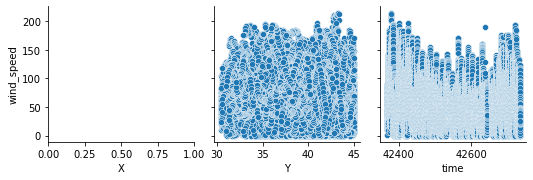

In [35]:
sns.pairplot(data,x_vars=['X', 'Y', 'time'],y_vars='wind_speed')

#### over a long duration of time we can consider it as uniform distrubution

## Now splitting

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=2)

In [37]:
X_train.shape

(54375, 3)

In [38]:
X_test.shape

(18126, 3)

In [39]:
Y_train.shape

(54375, 1)

In [40]:
Y_test.shape

(18126, 1)

### by default, 75% of data is used for training and 25% of data is used for testing.

In [42]:
##Now we use K nearest neighbor

In [49]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [50]:
check_coord = [[11.79, 33.169998, 42368.149155]]
print(knn.predict(check_coord))

[47.]


In [51]:
y_pred = knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

1.0


In [58]:

#checking whethere these random co-ordinates are present in our data set. 
#If it is present then I'm your we are the most unlucky guy in this world

data.loc[(data['X'] == 23.1) & (data['Y'] == 79.9)]

,X,Y,time,wind_speed,Time analysis


In [53]:
from datetime import datetime
timestamp = 1627112345
#convert timestamp to datetime object
curr_time = datetime.fromtimestamp(timestamp)
print("Current Time:", curr_time)

Current Time: 2021-07-24 13:09:05


In [54]:
new_coord = [[23.1, 79.9, 1627112345]]
print(knn.predict(new_coord))

[26.]


In [56]:
y_pred = knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

1.0
